In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df["Genre"].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], shape=(2337,), dtype=object)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [9]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Dropping Uneccessary coulmns Overview, Original_Languege and Poster-Url


In [12]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [13]:
# making list of column to be dropped
cols = ['Overview' , 'Original_Language' , 'Poster_Url']

In [14]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### Categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above.


In [16]:
# # Define the function for categorizing 'Vote_Average'
# def categorize_vote(vote):
#     if vote <= 4:
#         return 'not_popular'
#     elif 4 < vote <= 6:
#         return 'below_avg'
#     elif 6 < vote <= 8:
#         return 'average'
#     else:  # vote > 8
#         return 'popular'

# # Apply the function to the 'Vote_Average' column
# df['Vote_Average'] = df['Vote_Average'].apply(categorize_vote)


In [17]:
def catigorize_col(df, col, labels):
    """
    Categorizes a certain column based on its quartiles.

    Args:
    (df) df - dataframe we are processing
    (col) str - the name of the column to be categorized
    (labels) list - list of labels from min to max

    Returns:
    (df) df - dataframe with the categorized column
    """
    # Setting the edges to cut the column accordingly
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    
    # Categorizing the column using pd.cut
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    
    return df


In [18]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)
# confirming changes
df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [19]:
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
5,2022,The Commando,1750.484,33,average,"Action, Crime, Thriller"
6,2022,Scream,1675.161,821,average,"Horror, Mystery, Thriller"
7,2022,Kimi,1601.782,206,below_avg,Thriller
8,2022,Fistful of Vengeance,1594.013,114,not_popular,"Action, Crime, Fantasy"
9,2021,Eternals,1537.406,4726,popular,Science Fiction


In [20]:
# exploring column
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [21]:
df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

### We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [22]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [23]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [25]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [26]:
# setting up seaborn configurations
sns.set_style('whitegrid')

## Q1: What is the most frequent genre in the dataset?


In [27]:
# showing stats. on genre column
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

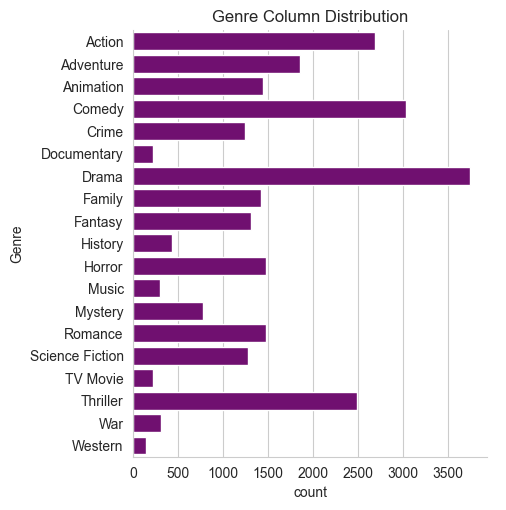

In [36]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count',
 #order = df['Genre'].value_counts().index,
 color = '#800080')
plt.title('Genre Column Distribution')
plt.show()


 We can notice from the above visual that Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

## Q2: What genres has highest votes ?

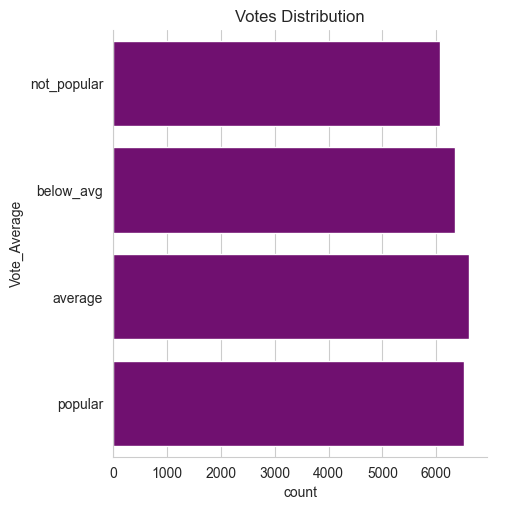

In [35]:
# visualizing genre column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
 #order = df['Vote_Average'].value_counts().index,
 color = '#800080')
plt.title('Votes Distribution')
plt.show()


## Q3: What movie got the highest popularity ? what's its genre ?

In [31]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


## Q4: What movie got the lowest popularity? what's its genre?

In [32]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


## Q5: Which year has the most filmmed movies?

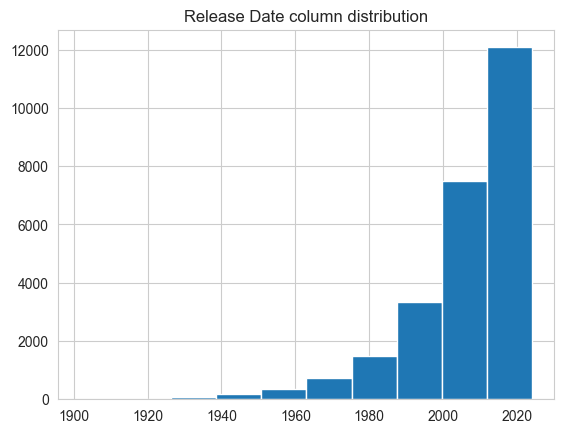

In [37]:
df['Release_Date'].hist()
plt.title('Release Date column distribution')
plt.show()

# Conclusion

### Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.
### Q2: What genres has highest votes ?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.
### Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .
### Q4: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.
### Q5: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset.
